<a href="https://colab.research.google.com/github/yedini/DL_tensorflow/blob/main/Part2_Lab01_Neural_Net_for_XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

print(tf.__version__)

2.5.0


# Lab01-1. Logistic Regression - Eager Excution        
XOR 문제를 logistic regression을 활용해서 풀기

In [ ]:
tf.random.set_seed(777)

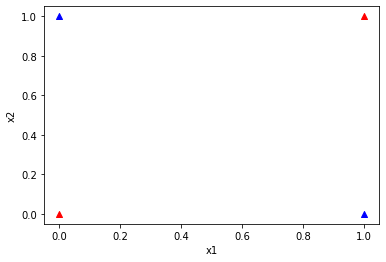

In [ ]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [ ]:
## tenforflow data API를 통해 학습시킬 값 담기.
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

# preprocess_data: 연산을 위해 type을 float로 맞춰주기
def preprocess_data(features, labels):
  features = tf.cast(features, tf.float32)
  labels = tf.cast(labels, tf.float32)
  return features, labels

모델에 쓰일 weight와 bias 초기값을 variable로 설정

In [ ]:
W = tf.Variable(tf.zeros((2,1)), name='weight')
b = tf.Variable(tf.zeros((1,)), name='bias')
print("W = {}, b = {}".format(W.numpy(), b.numpy()))

W = [[0.]
 [0.]], b = [0.]


sigmoid 함수를 가설로 선언         
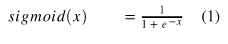

In [ ]:
def logistic_regression(features):
  hypothesis = tf.divide(1., 1. + tf.exp(tf.matmul(features, W) + b))
  return hypothesis

가설을 검증할 cost함수 정의


In [ ]:
def loss_fn(hypothesis, features, labels):
  cost = -tf.reduce_mean(labels*tf.math.log(logistic_regression(features)) +
                         (1-labels)*tf.math.log(1-hypothesis))
  return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

0.5를 기준으로 0 또는 1을 return하고 실제값과 비교하여 accyracy를 계산함

In [ ]:
def accuracy_fn(hypothesis, labels):
  predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
  accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
  return accuracy

GradientTape를 통해 경사값을 계산

In [ ]:
def grad(hypothesis, features, labels):
  with tf.GradientTape() as tape:
    loss_value = loss_fn(logistic_regression(features), features, labels)

    return tape.gradient(loss_value, [W,b])

tensorflow를 통한 실행을 위해 session을 선언함

In [ ]:
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(logistic_regression(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))
print("W = {}, B = {}".format(W.numpy(), b.numpy()))
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(logistic_regression(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.6931
Iter: 100, Loss: 0.6931
Iter: 200, Loss: 0.6931
Iter: 300, Loss: 0.6931
Iter: 400, Loss: 0.6931
Iter: 500, Loss: 0.6931
Iter: 600, Loss: 0.6931
Iter: 700, Loss: 0.6931
Iter: 800, Loss: 0.6931
Iter: 900, Loss: 0.6931
Iter: 1000, Loss: 0.6931
W = [[0.]
 [0.]], B = [0.]
Testset Accuracy: 0.5000


# Lab01-2. XOR - Neural Network - Eager Excuetion       
XOR 문제를 Neural network을 활용하여 풀기

In [ ]:
tf.random.set_seed(777)

lab01-1에서 사용한 data를 3 layer의 neural network를 통해 학습시킨 후 모델을 생성한다.

In [ ]:
W1 = tf.Variable(tf.random.normal((2, 1)), name='weight1')
b1 = tf.Variable(tf.random.normal((1,)), name='bias1')

W2 = tf.Variable(tf.random.normal((2, 1)), name='weight2')
b2 = tf.Variable(tf.random.normal((1,)), name='bias2')

W3 = tf.Variable(tf.random.normal((2, 1)), name='weight3')
b3 = tf.Variable(tf.random.normal((1,)), name='bias3')

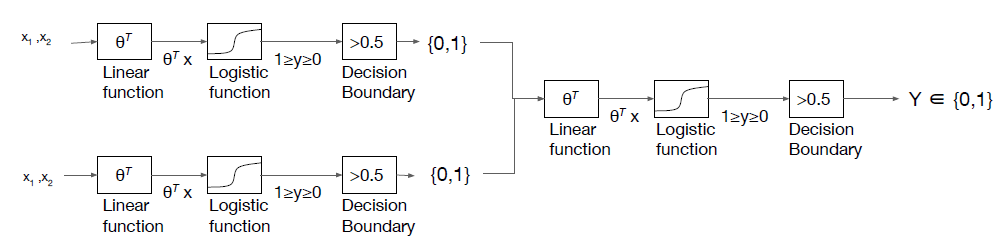

In [ ]:
def neural_net(features):
    layer1 = tf.sigmoid(tf.matmul(features, W1) + b1)
    layer2 = tf.sigmoid(tf.matmul(features, W2) + b2)
    layer3 = tf.concat([layer1, layer2],-1)
    layer3 = tf.reshape(layer3, shape = [-1,2])
    hypothesis = tf.sigmoid(tf.matmul(layer3, W3) + b3)
    return hypothesis

def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(neural_net(features),labels)
    return tape.gradient(loss_value, [W1, W2, W3, b1, b2, b3])

In [ ]:
EPOCHS = 5000     # eopchs를 늘리면 정확도가 더 높아진다.

for step in range(EPOCHS):
    for features, labels  in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(neural_net(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W1, W2, W3, b1, b2, b3]))
        if step % 500 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(neural_net(features),labels)))
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(neural_net(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.6905
Iter: 500, Loss: 0.6900
Iter: 1000, Loss: 0.6895
Iter: 1500, Loss: 0.6889
Iter: 2000, Loss: 0.6882
Iter: 2500, Loss: 0.6873
Iter: 3000, Loss: 0.6864
Iter: 3500, Loss: 0.6853
Iter: 4000, Loss: 0.6841
Iter: 4500, Loss: 0.6827
Testset Accuracy: 0.7500


# Lab09-3. XOR - Deep neural network - eager      
XOR 문제를 deep neural network를 활용해서 풀기

- neural network를 하나의 class로 만들어서 사용함!
- 4 layer neural network

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))
nb_classes = 10

class wide_deep_nn():
    def __init__(self, nb_classes):
        super(wide_deep_nn, self).__init__()        
     
        self.W1 = tf.Variable(tf.random.normal((2, nb_classes)), name='weight1')
        self.b1 = tf.Variable(tf.random.normal((nb_classes,)), name='bias1')

        self.W2 = tf.Variable(tf.random.normal((nb_classes, nb_classes)), name='weight2')
        self.b2 = tf.Variable(tf.random.normal((nb_classes,)), name='bias2')

        self.W3 = tf.Variable(tf.random.normal((nb_classes, nb_classes)), name='weight3')
        self.b3 = tf.Variable(tf.random.normal((nb_classes,)), name='bias3')

        self.W4 = tf.Variable(tf.random.normal((nb_classes, 1)), name='weight4')
        self.b4 = tf.Variable(tf.random.normal((1,)), name='bias4')
        
        self.variables = [self.W1,self.b1,self.W2,self.b2,self.W3,self.b3,self.W4,self.b4]
        
    def preprocess_data(self, features, labels):
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        return features, labels
        
    def deep_nn(self, features):
        layer1 = tf.sigmoid(tf.matmul(features, self.W1) + self.b1)
        layer2 = tf.sigmoid(tf.matmul(layer1, self.W2) + self.b2)
        layer3 = tf.sigmoid(tf.matmul(layer2, self.W3) + self.b3)
        hypothesis = tf.sigmoid(tf.matmul(layer3, self.W4) + self.b4)
        return hypothesis
    
    def loss_fn(self, hypothesis, features, labels):
        cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
        return cost

    def accuracy_fn(self, hypothesis, labels):
        predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
        accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
        return accuracy

    def grad(self, hypothesis, features, labels):
        with tf.GradientTape() as tape:
            loss_value = self.loss_fn(self.deep_nn(features),features,labels)
        return tape.gradient(loss_value,self.variables)
    
    def fit(self, dataset, EPOCHS=10000, verbose=100):
        optimizer =  tf.keras.optimizers.SGD(learning_rate=0.01)
        for step in range(EPOCHS):
            for features, labels  in dataset:
                features, labels = self.preprocess_data(features, labels)
                grads = self.grad(self.deep_nn(features), features, labels)
                optimizer.apply_gradients(grads_and_vars=zip(grads, self.variables))
                if step % verbose == 0:
                    print("Iter: {}, Loss: {:.4f}".format(step, self.loss_fn(self.deep_nn(features),features,labels)))

    def test_model(self,x_data, y_data):
        x_data, y_data = self.preprocess_data(x_data, y_data)
        test_acc = self.accuracy_fn(self.deep_nn(x_data),y_data)
        print("Testset Accuracy: {:.4f}".format(test_acc))

In [ ]:
model = wide_deep_nn(nb_classes)
model.fit(dataset)

Iter: 0, Loss: 1.2497
Iter: 100, Loss: 0.7382
Iter: 200, Loss: 0.6897
Iter: 300, Loss: 0.6860
Iter: 400, Loss: 0.6853
Iter: 500, Loss: 0.6848
Iter: 600, Loss: 0.6844
Iter: 700, Loss: 0.6839
Iter: 800, Loss: 0.6833
Iter: 900, Loss: 0.6828
Iter: 1000, Loss: 0.6823
Iter: 1100, Loss: 0.6817
Iter: 1200, Loss: 0.6812
Iter: 1300, Loss: 0.6806
Iter: 1400, Loss: 0.6800
Iter: 1500, Loss: 0.6794
Iter: 1600, Loss: 0.6788
Iter: 1700, Loss: 0.6782
Iter: 1800, Loss: 0.6775
Iter: 1900, Loss: 0.6768
Iter: 2000, Loss: 0.6761
Iter: 2100, Loss: 0.6754
Iter: 2200, Loss: 0.6746
Iter: 2300, Loss: 0.6739
Iter: 2400, Loss: 0.6731
Iter: 2500, Loss: 0.6722
Iter: 2600, Loss: 0.6714
Iter: 2700, Loss: 0.6705
Iter: 2800, Loss: 0.6696
Iter: 2900, Loss: 0.6686
Iter: 3000, Loss: 0.6676
Iter: 3100, Loss: 0.6666
Iter: 3200, Loss: 0.6656
Iter: 3300, Loss: 0.6645
Iter: 3400, Loss: 0.6633
Iter: 3500, Loss: 0.6622
Iter: 3600, Loss: 0.6610
Iter: 3700, Loss: 0.6597
Iter: 3800, Loss: 0.6584
Iter: 3900, Loss: 0.6571
Iter: 4000, 

In [ ]:
model.test_model(x_data, y_data)

Testset Accuracy: 1.0000


In [ ]:
$ tensorboard - logdir=./logs/xor_logs

SyntaxError: ignored